# Girvan-Newman Algorithm for Community Detection

## Introduction
This tutorial will provide a full introduction of Girvan-Newman algorithm. In real world data science work, the community detection algorithm is widely used. For example, two users in social networks, such as Facebook and Twitter, are considered connected if they follows each other. In these networks, there is usually communities where people are joined together in tightly knit groups, for example, a group of friends usually follows every other person in this group). Between communities, there are only looser connections. When we already have the data of connections between all users in a network, Girvan-Newman algorithm is a sensitive and reliable method to detect these communities.

### Tutorial contents
In this tutorial, although we will implement the Girvan-Newman algorithm in python3 on our own, we'll have a brief look of how to use existing library. Besides, the algorithm itself based on the Dijsktra’s algorithm. For the readability and simplicity of the tutorial, we use the Dijsktra's algorithm's library provided by [NetworkX](http://networkx.github.io).

We will cover the following topics in this tutorial:


* Briefly Introduction and install NetworkX
* Basic concept
* How to use Girvan-Newman algorithm in NetworkX
* The modularity of community structure
* The implementation of Girvan-Newman

## Briefly introduction and install NetworkX
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
The current released version of NetworkX can be installed by using `pip`:
```
$ pip install networkx
```

To upgrade to a newer release use the `--upgrade` flag:
```
$ pip install --upgrade networkx
```

If you have Git installed on your system, it is also possible to install the development version of NetworkX. Before installing the development version, you may need to uninstall the standard version of networkx using `pip`:
```
$ pip uninstall networkx
```

Then do:
```
$ git clone https://github.com/networkx/networkx.git
$ cd networkx
$ pip install -e .
```

For the later use of NetworkX, import the package. The plot tool for showing the graph should be imported as well.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Basic concept

Let's start with a simple and straight foward example of a network with community structure.
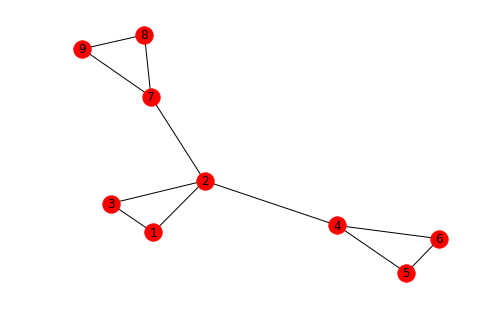
In this picture, we can figure out that there are three communities by eyes. The communities are densly connected vertices. The first community is constructed by node `1`, `2` and `3`. Node `4`, `5` and `6` form the second group and `7`, `8`, `9` the third. Between the three communities, there are only much lower density of connections.

This network can be represented by a `Graph` object in NetworkX:

In [2]:
G = nx.Graph()
G.add_nodes_from(['1','2','3','4','5','6','7','8','9'])
G.add_edges_from([('1','2'),('1','3'),('2','3')])
G.add_edges_from([('4','5'),('4','6'),('5','6')])
G.add_edges_from([('7','8'),('7','9'),('8','9')])
G.add_edges_from([('2','4'),('2','7')])

Before explain the basic idea of Girvan-Newman algorithm, we need to learn the concept of betweeness. Betweeness is a property of edges in graph. For each edge, the betweeness of this edge is `N` means that there are `N` shortest path in this whole graph pass this edge. 

For example, the betweeness of the edge between node `5` and node `6` is `1` because only shortest path between node `5` and node `6` passes this edge. While the betweeness of the edge between node `4` and node `5` is `7`. It is easily to figure out that except node `6`, all other node in the graph have the shortest path to node `5` which include the edge between node `5` and node `4`. There is a more complicated example that the betweeness of the edge between `2` and `4`. But after observing the graph for a minute, we can find that nodes left to this edge can only reach nodes right to this edge by passing this edge. There are 6 nodes left to this edge and 3 nodes right to it. So the betweeness of this edge is `18`.

The basic idea of Girvan-Newman algorithm is that:
* **The number of shortest path passes edges in communities are relatively small**
* **The number of shortest path passes edges between communities are relatively large**

So the step of Girvan-Newman algorithm is:
1. Calculate the betweeness of every edge:

2. Delete the edges with largest betweeness:

3. Calculate the betweeness of the remained edges

4. Do step 2 and step 3 repeatedly, until there are only single vertice in each community

For our extremly simple example, the edges with largest betweeness of the original graph is edge between node `7` and `2`, node between `4` and `2`. The betweeness of both of them is 18. After delete these two edges, the graph looks like this:
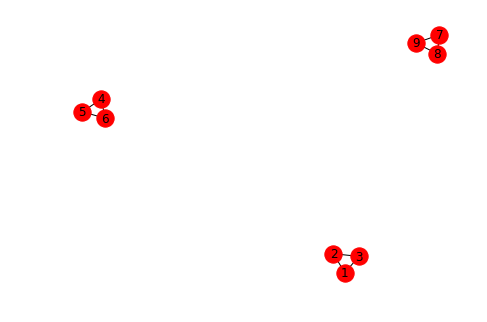

Then, we follow the step 3 and find that the betweeness of all remained edges in the graph is now 1. After delete these edges, the graph become a network of 9 community and each community has only single vertice. So according to the step 4, we're done.

Also, after applying Girvan-Newman algorithm on a graph, we can get the hierarchical breakdown of the graph at all the different levels of the edge removals.

There is a relatively more comlicated example with the same idea.
![Another example](http://slideplayer.com/10513595/35/images/74/Girvan-Newman%3A+Example.jpg)

For the graph with m edges and n vertices, the time complexity of calculating betweeness is O(mn) and the total time complexity is O(mˆ2n)

## How to use Girvan-Newman algorithm in NetworkX

NetworkX provide easy to use library to apply Girvan-Newman algorithm on a graph. The return value of the Girvan-Newman algorithm is the dendrogram as a sequence of successive breakdowns of the nodes. The community of our extremly simple example can be generated by:

In [3]:
communities = nx.community.girvan_newman(G)
list(communities)

[({'1', '2', '3', '7', '8', '9'}, {'4', '5', '6'}),
 ({'1', '2', '3'}, {'4', '5', '6'}, {'7', '8', '9'}),
 ({'1'}, {'2', '3'}, {'4', '5', '6'}, {'7', '8', '9'}),
 ({'1'}, {'2'}, {'3'}, {'4', '5', '6'}, {'7', '8', '9'}),
 ({'1'}, {'2'}, {'3'}, {'4'}, {'5', '6'}, {'7', '8', '9'}),
 ({'1'}, {'2'}, {'3'}, {'4'}, {'5'}, {'6'}, {'7', '8', '9'}),
 ({'1'}, {'2'}, {'3'}, {'4'}, {'5'}, {'6'}, {'7'}, {'8', '9'}),
 ({'1'}, {'2'}, {'3'}, {'4'}, {'5'}, {'6'}, {'7'}, {'8'}, {'9'})]

For the relatively more complicated example, the result of the Girvan-Newman algorithm is:

In [4]:
G1 = nx.Graph()
G1.add_edges_from([('1','2'), ('1','3'), ('2','3'), ('4','5'), ('4','6'), ('5','6'), 
                  ('9','10'), ('9','11'), ('10','11'), ('12','13'), ('12','14'), ('13','14'),
                  ('3','7'), ('6','7'), ('7','8'), ('8','9'), ('8','12')])
communities = nx.community.girvan_newman(G1)
list(communities)

[({'1', '2', '3', '4', '5', '6', '7'},
  {'10', '11', '12', '13', '14', '8', '9'}),
 ({'1', '2', '3'},
  {'4', '5', '6', '7'},
  {'10', '11', '12', '13', '14', '8', '9'}),
 ({'1', '2', '3'},
  {'4', '5', '6', '7'},
  {'10', '11', '9'},
  {'12', '13', '14', '8'}),
 ({'1', '2', '3'},
  {'4', '5', '6'},
  {'10', '11', '9'},
  {'12', '13', '14', '8'},
  {'7'}),
 ({'1', '2', '3'},
  {'4', '5', '6'},
  {'10', '11', '9'},
  {'12', '13', '14'},
  {'7'},
  {'8'}),
 ({'1'},
  {'2', '3'},
  {'4', '5', '6'},
  {'10', '11', '9'},
  {'12', '13', '14'},
  {'7'},
  {'8'}),
 ({'1'},
  {'2'},
  {'3'},
  {'4', '5', '6'},
  {'10', '11', '9'},
  {'12', '13', '14'},
  {'7'},
  {'8'}),
 ({'1'},
  {'2'},
  {'3'},
  {'4'},
  {'5', '6'},
  {'10', '11', '9'},
  {'12', '13', '14'},
  {'7'},
  {'8'}),
 ({'1'},
  {'2'},
  {'3'},
  {'4'},
  {'5'},
  {'6'},
  {'10', '11', '9'},
  {'12', '13', '14'},
  {'7'},
  {'8'}),
 ({'1'},
  {'2'},
  {'3'},
  {'4'},
  {'5'},
  {'6'},
  {'9'},
  {'10', '11'},
  {'12', '13', '14'},

## The modularity of the community structure

There are some disadvantage of Girvan-Newman algorithm:
* The result of number of communities is unknown until the calculation is finished
* The time complexity is too high for some shortest path may be repeatedly calculated

To solve these problem and improve the efficiency of the community detection algorithm, Newman proposed a concept called modularity.

Modularity is a value to evaluate how good a community structure is. The larger the modularity is, the better the community structure is. Modularity can be calculated by the following formula by definition:
![formula](https://img-blog.csdn.net/20150508111209155)

and,
![formula](https://img-blog.csdn.net/20150508110737090)

kv means the degree of the vertice v.

δ(cv,cw) is 1 if vertice w and v are in the same community, otherwise zero.

m is the total number of edges in the graph.

By using the concept of modularity, we can now improve our community detection algorithm. Each time when we split the community, we calculate the modularity and when the modularity is the largest, split the community.

## The implementation of Girvan-Newman
An implementation of Girvan-Newman algorithm written in python is presented.

Some library usable for the algorithm:

In [5]:
import networkx as nx
import random as rand

The main routine of the algorithm:

In [6]:
def girvan_newman(G):
    
    print('Nodes in the original graph', G.nodes())
    print('Edges in the original graph', G.edges())
    
    m = G.number_of_nodes()
    A = nx.adj_matrix(G)

    weighted_m = 0.0
    for i in range(0,m):
        for j in range(0,m):
            weighted_m += A[i,j]
    weighted_m = weighted_m/2.0
    print('Number of edge', m)
    print('Number of edge with weight', weighted_m)

    #calculate the weighted degree for each node
    degree = calculateDegree(G.nodes(), G.edges())
    print('The degree of nodes', degree)
    
    BestQ = 0.0
    Q = 0.0
    while True:    
        Community(G)
        Q = calculateQ(G, degree, weighted_m);
        print("Modularity of decomposed G: %f" % Q)
        if Q > BestQ:
            BestQ = Q
            Bestcomps = nx.connected_components(G)    #Best Split
            print("Get best comminity.")
            print("Components:", list(Bestcomps))
            print("Remained edge count:", G.number_of_edges())
        if G.number_of_edges() == 0:
            print("No edge remained, done.")
            break
    if BestQ > 0.0:
        print("Max modularity (Q): %f" % BestQ)
        print("Graph communities:", list(Bestcomps))
    else:
        print("Max modularity (Q): %f" % BestQ)

The helper function for calculate degree of each node:

In [7]:
def calculateDegree(nodes, edges):
    result = {}
    for edge in edges:
        if edge[0] in result:
            result[edge[0]] += 1
        else:
            result[edge[0]] = 1
        if edge[1] in result:
            result[edge[1]] += 1
        else:
            result[edge[1]] = 1
    for node in nodes:
        if not node in result:
            result[node] = 0
    return result

The helper function for split the community:

In [8]:
def Community(G):
    print("Calling CmtyGirvanNewmanStep")
    init_ncomp = nx.number_connected_components(G)    #no of components
    ncomp = init_ncomp
    while ncomp <= init_ncomp:
        bw = nx.edge_betweenness_centrality(G, weight='weight')    #edge betweenness for G
        #find the edge with max centrality
        values = list(bw.values())
        if len(values) == 0:
            break
        max_ = max(values+[0])
        #find the edge with the highest centrality and remove all of them if there is more than one!
        for k, v in bw.items():
            if float(v) == max_:
                G.remove_edge(k[0],k[1])    #remove the central edge
        ncomp = nx.number_connected_components(G)    #recalculate the no of components

The helper function for calculate modularity:

In [9]:
#compute the modularity of current split
def calculateQ(G, deg_, weighted_m):
    New_A = nx.adj_matrix(G)
    New_deg = {}
    New_deg = calculateDegree(G.nodes(), G.edges())
    print('The degree of nodes in new graph', New_deg)
    #Let's compute the Q
    comps = nx.connected_components(G)    #list of components    
    print('No of communities in decomposed G: %d' % nx.number_connected_components(G))
    Mod = 0    #Modularity of a given partitionning
    for c in comps:
        EWC = 0    #no of edges within a community
        RE = 0    #no of random edges
        for u in c:
            EWC += New_deg[u]
            RE += deg_[u]        #count the probability of a random edge
        Mod += ( float(EWC) - float(RE*RE)/float(2*weighted_m) )
    Mod = Mod/float(2*weighted_m)
    print("Modularity: %f" % Mod)
    return Mod

Now test our implementation of the improved Girvan-Newman algorithm on both two examples:

In [10]:
girvan_newman(G)

Nodes in the original graph ['1', '2', '3', '4', '5', '6', '7', '8', '9']
Edges in the original graph [('1', '2'), ('1', '3'), ('2', '3'), ('2', '4'), ('2', '7'), ('4', '5'), ('4', '6'), ('5', '6'), ('7', '8'), ('7', '9'), ('8', '9')]
Number of edge 9
Number of edge with weight 11.0
The degree of nodes {'1': 2, '2': 4, '3': 2, '4': 3, '7': 3, '5': 2, '6': 2, '8': 2, '9': 2}
Calling CmtyGirvanNewmanStep
The degree of nodes in new graph {'1': 2, '2': 2, '3': 2, '4': 2, '5': 2, '6': 2, '7': 2, '8': 2, '9': 2}
No of communities in decomposed G: 3
Modularity: 0.483471
Modularity of decomposed G: 0.483471
Get best comminity.
Components: [{'3', '2', '1'}, {'4', '5', '6'}, {'9', '7', '8'}]
Remained edge count: 9
Calling CmtyGirvanNewmanStep
The degree of nodes in new graph {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
No of communities in decomposed G: 9
Modularity: -0.119835
Modularity of decomposed G: -0.119835
No edge remained, done.
Max modularity (Q): 0.483471
G

In [11]:
girvan_newman(G1)

Nodes in the original graph ['1', '2', '3', '4', '5', '6', '9', '10', '11', '12', '13', '14', '7', '8']
Edges in the original graph [('1', '2'), ('1', '3'), ('2', '3'), ('3', '7'), ('4', '5'), ('4', '6'), ('5', '6'), ('6', '7'), ('9', '10'), ('9', '11'), ('9', '8'), ('10', '11'), ('12', '13'), ('12', '14'), ('12', '8'), ('13', '14'), ('7', '8')]
Number of edge 14
Number of edge with weight 17.0
The degree of nodes {'1': 2, '2': 2, '3': 3, '7': 3, '4': 2, '5': 2, '6': 3, '9': 3, '10': 2, '11': 2, '8': 3, '12': 3, '13': 2, '14': 2}
Calling CmtyGirvanNewmanStep
The degree of nodes in new graph {'1': 2, '2': 2, '3': 3, '7': 2, '4': 2, '5': 2, '6': 3, '9': 3, '10': 2, '11': 2, '8': 2, '12': 3, '13': 2, '14': 2}
No of communities in decomposed G: 2
Modularity: 0.441176
Modularity of decomposed G: 0.441176
Get best comminity.
Components: [{'3', '5', '1', '2', '6', '7', '4'}, {'8', '10', '12', '14', '11', '13', '9'}]
Remained edge count: 16
Calling CmtyGirvanNewmanStep
The degree of nodes in n

## Summary and reference
This tutorial illustrated the basic idea behind the classical community detection algorithm and the method to improve it. Much more details of the Girvan-Newman algorithm and modularity is available from the following links:
1. [Girvan and Newman, “Community structure in social and biological networks”](http://www.pnas.org/content/99/12/7821)
2. [Communities - NetworkX 2.1 documentation](https://networkx.github.io/documentation/stable/reference/algorithms/community.html)
3. [Modularity and community structure in networks](http://www.pnas.org/content/pnas/103/23/8577.full.pdf)